## Simple 1-Bus example  

Exploring a 1-bus case where a capacitor is connected or not connected  
Plot voltage and everything in steady state and transient  

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [93]:
## Function blocks

# print table for latex
def print_latex_table(zload, zline, Vmag, Vphase, S):
    zldr = 1        # zload round number
    zlnr = 2        # zline round number
    Pr = 3          # power rounding
    Qr = 3          # Q rounding

    zload = zload * 1e3
    zline = zline * 1e3

    print("\\begin{table}[ht]")
    print("\\centering")
    print("\\caption{caption here}")
    print("\\label{tab:}")
    print("\\begin{tabular}{|c|c|c|c|c|}")
    print("\\hline")
    print("$Z_2$ & $Z_4$ & $Z_6$ & $Z_8$ & $Z_{10}$ \\\\")
    print(f"{np.round(zload[0],zldr)} & {np.round(zload[1],zldr)} & {np.round(zload[2],zldr)} & {np.round(zload[3],zldr)} & {np.round(zload[4],zldr)} \\\\")
    print("\\hline")
    print("$Z_1$ & $Z_3$ & $Z_5$ & $Z_7$ & $Z_9$ \\\\")
    print(f"{np.round(zline[0],zlnr)} & {np.round(zline[1],zlnr)} & {np.round(zline[2],zlnr)} & {np.round(zline[3],zlnr)} & {np.round(zline[4],zlnr)} \\\\")
    print("\\hline")
    print("$|V_2|$ & $|V_3|$ & $|V_4|$ & $|V_5|$ & $|V_6|$ \\\\")
    print(f"{np.round(Vmag[0], 2)} & {np.round(Vmag[1], 2)} & {np.round(Vmag[2], 2)} & {np.round(Vmag[3], 2)} & {np.round(Vmag[4], 2)} \\\\")
    print("\\hline")
    print("$\\angle V_2$ & $\\angle V_3$ & $\\angle V_4$ & $\\angle V_5$ & $\\angle V_6$ \\\\")
    print(f"{np.round(Vphase[0], 2)} & {np.round(Vphase[1], 2)} & {np.round(Vphase[2], 2)} & {np.round(Vphase[3], 2)} & {np.round(Vphase[4], 2)} \\\\")
    print("\\hline")
    print("$P_2$ & $P_3$ & $P_4$ & $P_5$ & $P_6$ \\\\")
    print(f"{np.round(S[0].real, Pr)} & {np.round(S[1].real, Pr)} & {np.round(S[2].real, Pr)} & {np.round(S[3].real, Pr)} & {np.round(S[4].real, Pr)} \\\\")
    print("\\hline")
    print("$Q_2$ & $Q_3$ & $Q_4$ & $Q_5$ & $Q_6$ \\\\")
    print(f"{np.round(S[0].imag, Qr)} & {np.round(S[1].imag, Qr)} & {np.round(S[2].imag, Qr)} & {np.round(S[3].imag, Qr)} & {np.round(S[4].imag, Qr)} \\\\")
    print("\\hline")
    print("\\end{tabular}")
    print("\\end{table}")


def compute_voltages(zline, zload, Vs):
    z = np.column_stack((zline, zload)).ravel()  # Combine line and load impedances
    y = 1 / z  # Admittance
    Y = np.array([  [y[0]+y[1]+y[2], -y[2],           0,              0,              0],
                    [-y[2],           y[2]+y[3]+y[4], -y[4],          0,              0],
                    [0,               -y[4],          y[4]+y[5]+y[6], -y[6],          0],
                    [0,               0,              -y[6],          y[6]+y[7]+y[8], -y[8]],
                    [0,               0,              0,              -y[8],          y[8]+y[9]]])  # Admittance matrix
    i = np.array([Vs * y[0], 0, 0, 0, 0])  # Current vector
    V = np.linalg.inv(Y) @ i  # Solve for voltages
    Vmag = np.abs(V)  # Magnitude of voltages
    Vphase = np.degrees(np.angle(V))  # Phase of voltages
    return V, Vmag, Vphase

Case with NO capacitor installed  

Circuit diagram:  

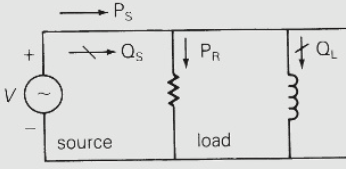

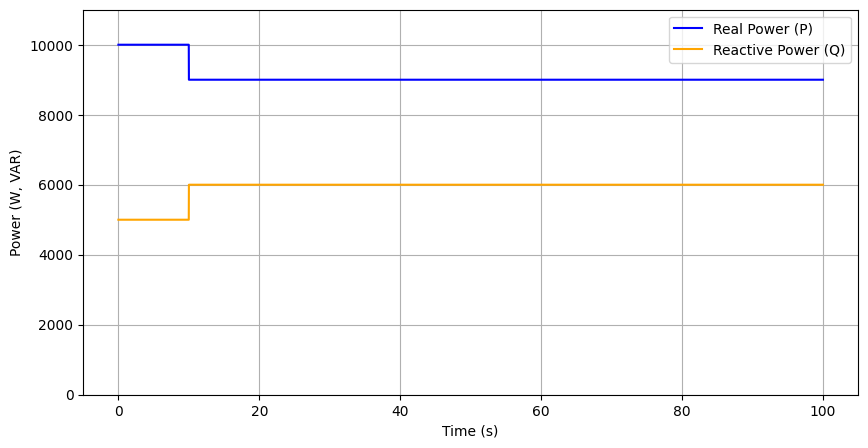

In [5]:
## Without Capacitor
# set up load
Load_P1 = 1e4           # Load Real Power in Watts
Load_P2 = 9e3           # Load Real Power in Watts
Load_Q1 = 5e3           # Load Reactive Power in VARs
Load_Q2 = 7e3           # Load Reactive Power in VARs

# set up time and load change
t = np.linspace(0, 100, 10000)  # Time in seconds
Pt = np.zeros(t.shape)
Pt[0:1000] = Load_P1
Pt[1000:10000] = Load_P2
Qt = np.zeros(t.shape)
Qt[0:1000] = Load_Q1
Qt[1000:10000] = Load_Q2

# compute other quantities
St = np.sqrt(Pt**2 + Qt**2)  # Apparent Power in VA
Vt = 
It = 

# plot
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(t, Pt, label='Real Power (P)', color='blue')
plt.plot(t, Qt, label='Reactive Power (Q)', color='orange')
plt.plot(t, St, label='Apparent Power (S)', color='green')
# plt.title('Load Power without Capacitor')
plt.xlabel('Time (s)')
plt.ylabel('Power (W, VAR)')
plt.ylim(0,Pt.max()*1.1)
plt.legend()
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(t, Vt, label='Voltage (V)', color='red')
plt.plot(t, It, label='Current (I)', color='purple')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (RMS) (V), Current (RMS) (A)')
plt.legend()
plt.grid()
plt.show()


Pause all that shit, preliminary problem: 

Given this network, if all the loads are zero, what is the voltage profile like at each node? 

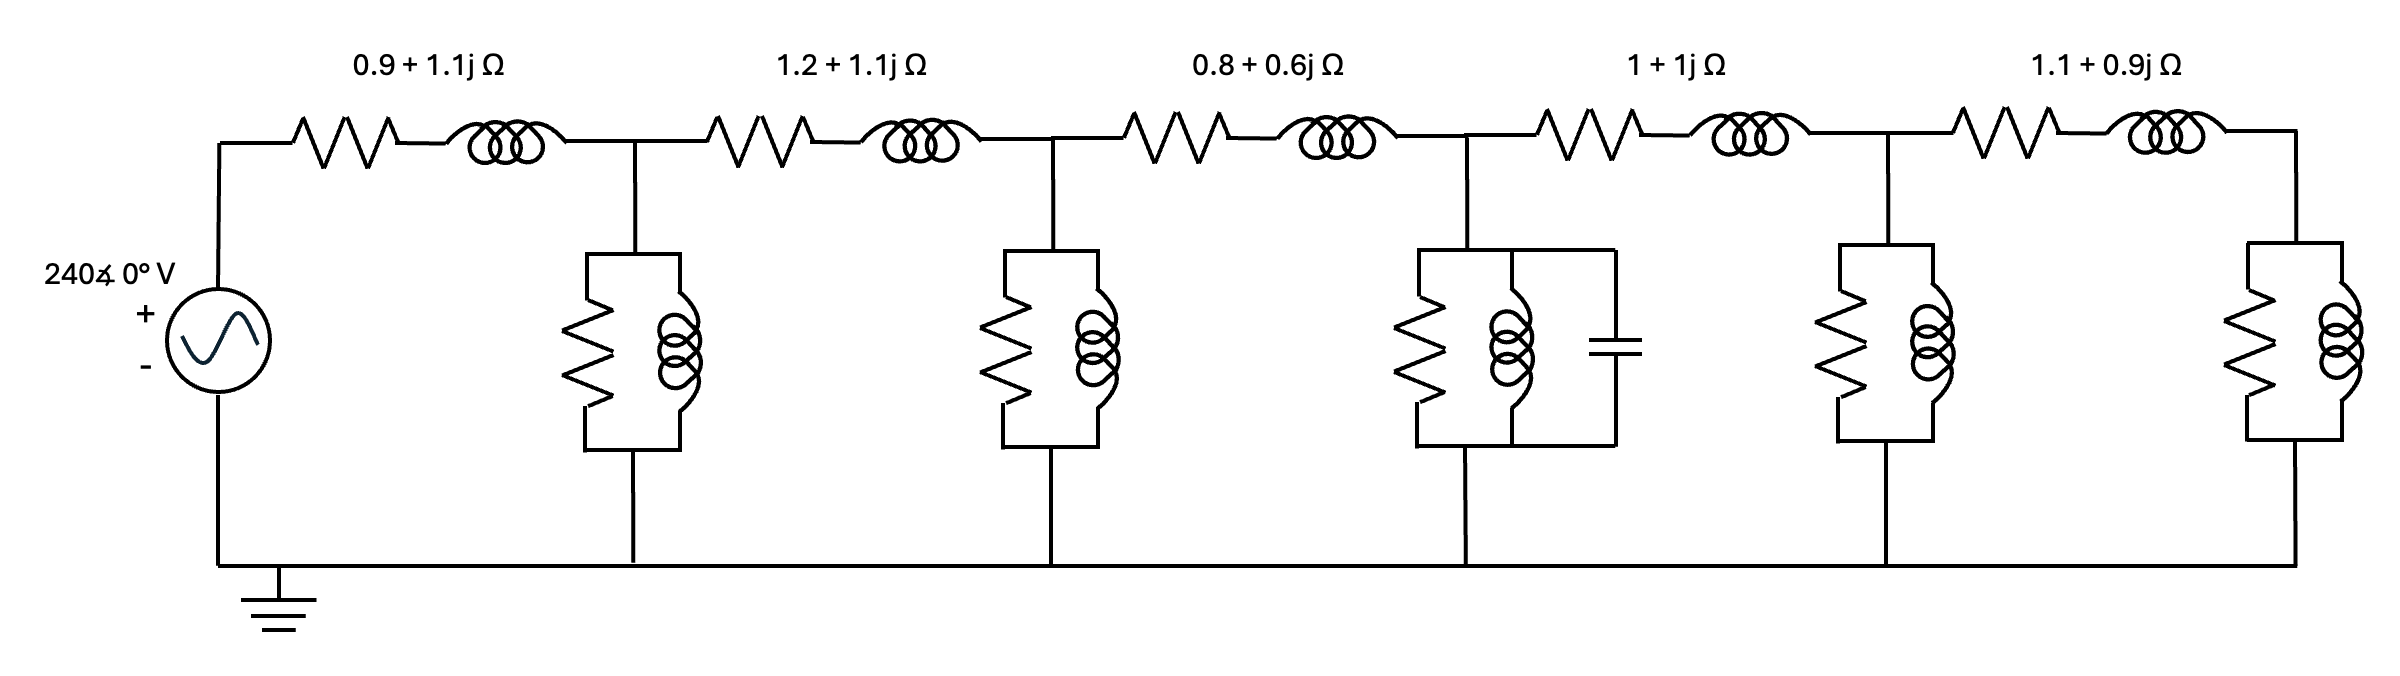


In [ ]:
V0 = 240 + 0j
Z = np.array([0.09+0.11j, 0.12+0.11j, 0.08+0.06j, 0.1+0.1j, 0.11+0.09j])  # Impedance in Ohms
Z_tot = np.sum(Z)       # Total Impedance in Ohms
I = (V0) / Z_tot      # Current in Amperes   I = V / Z
# print(I)
V1 = V0 - I * Z[0]
V = V0 - I * np.cumsum(Z)   # Voltage across the all loads in Volts
Vmag = np.abs(V)            # Magnitude of Voltage
Vphase = np.angle(V)        # Phase of Voltage
# V1mag = np.abs(V1)       # Magnitude of Voltage V1
# V1phase = np.angle(V1)   # Phase of Voltage V1

print(np.round(Vphase,2), np.round(Vphase,2))

# add a plot here maybe? This is just a big voltage divider, changing R/X down doesn't make the voltage drops better



[190.83 133.91  99.05  49.71   0.  ] [-0.03 -0.04 -0.02 -0.07  1.57]


In [21]:
# testing toy example - resistive loads only
vs = 24
z1 = 1
z2 = 12
z3 = 1
z4 = 10

v = np.array([vs, vs])
z = np.array([[z1 + z2, -z2],
              [z1, z3 + z4]])
zi = np.linalg.inv(z)           # Inverse of the impedance matrix
i = zi@v.T
I1 = i[0]
I3 = i[1]
I2 = I1 - I3

Ps = I1 * vs
P2 = I2**2 * z2
P4 = I3**2 * z4

print(f"Power in circuit: Ps={Ps:.2f} W, P2={P2:.2f} W, P4={P4:.2f} W")


Power in circuit: Ps=85.47 W, P2=34.81 W, P4=34.52 W


In [ ]:
# toy circuit with complex impedances
vs = 240 + 0j
z1 = 0.01 + 0.02j
z2 = 0.12 + 0.05j
z3 = 0.01 + 0.03j
z4 = 0.1 - 0.06j

v = np.array([vs, vs])
z = np.array([[z1 + z2, -z2],
              [z1, z3 + z4]])
zi = np.linalg.inv(z)           # Inverse of the impedance matrix
i = zi@v.T
I1 = i[0]
I3 = i[1]
I2 = I1 - I3

V2 = I2 * z2
V4 = I3 * z4

S = np.zeros(3, dtype=complex)  # Initialize complex power array
S[0] = vs * np.conj(I1)
S[1] = V2 * np.conj(I2)
S[2] = V4 * np.conj(I3)
S /= 1000
print(f"Power in circuit: Ss={S[0]:.2f} kVA, S2={S[1]:.2f} kVA, S4={S[2]:.2f} kVA")


Power in circuit: Ss=710.36+217.31j kVA, S2=280.41+116.84j kVA, S4=303.77-182.26j kVA


In [8]:
## Solve Example 1 from paper
r = np.array([0.1, 1.5, 0.3, 1.2, 0.2, 1.7])  # Resistances in Ohms
Vs = 24
g = 1 / r  # Conductances in S
Is = g[0] * Vs
I = np.array([Is, 0, 0])
G = np.array([[g[0] + g[1] + g[2], -g[2], 0],
              [-g[2], g[2] + g[3] + g[4], -g[4]],
              [0, -g[5], g[4] + g[5]]])  # Conductance matrix
V = np.linalg.inv(G) @ I  # Solve for voltages
print(f"Voltages in circuit: V2={V[0]:.2f} V, V3={V[1]:.2f} V, V4={V[2]:.2f} V")
P = np.array([g[1], g[3], g[5]]) * V**2  # Power in each branch
print(f"Power in circuit: P2={P[0]:.2f} W, P4={P[1]:.2f} W, P6={P[2]:.2f} W")


Voltages in circuit: V2=18.88 V, V3=7.28 V, V4=0.77 V
Power in circuit: P2=237.55 W, P4=44.19 W, P6=0.35 W


## Solve the real thing - RLC Loads, Steady State

Using the network below, find the voltage at each node, the power consumed by each load, the power supplied by the source. 

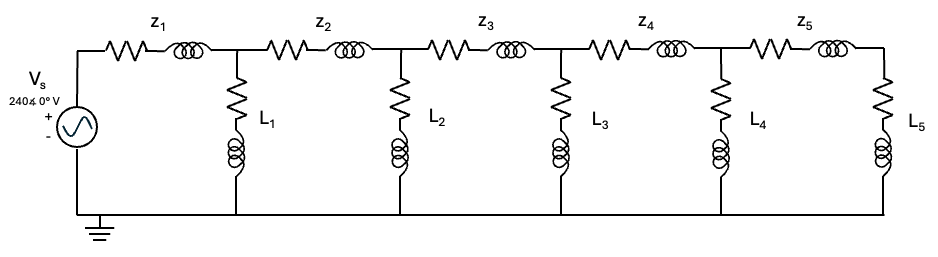

In [ ]:
## Ex2 in the paper

showprint = True

np.random.seed(41)
zline = np.random.uniform(0.4, 0.9, size=(5)) + 1j * np.random.uniform(0.4, 0.9, size=(5))  # Random complex impedances
if showprint: print("Line Impedances (Ohms): ", np.round(zline,2))
zload = np.random.uniform(5, 25, size=(5)) + 1j * np.random.uniform(0.5, 2.5, size=(5))        # Random complex loads with reasonable power factor
if showprint: print("Load Impedances (Ohms): ", np.round(zload,2))
z = np.column_stack((zline, zload)).ravel()  # Combine line and load impedances
Vs = 240 + 0j  # Source voltage
y = 1 / z  # Admittance
Y = np.array([[y[0]+y[1]+y[2], -y[2],           0,              0,              0],
              [-y[2],           y[2]+y[3]+y[4], -y[4],          0,              0],
              [0,               -y[4],          y[4]+y[5]+y[6], -y[6],          0],
              [0,               0,              -y[6],          y[6]+y[7]+y[8], -y[8]],
              [0,               0,              0,              -y[8],          y[8]+y[9]]])  # Admittance matrix
i = np.array([Vs * y[0], 0, 0, 0, 0])  # Current vector
V = np.linalg.inv(Y) @ i  # Solve for voltages
Vphase = np.abs(V)  # Magnitude of voltages
Vphase = np.degrees(np.angle(V))  # Phase of voltages
if showprint:
    print("Voltage Magnitudes: ")
    print("node 2: ", np.round(Vmag[0], 2), "V")
    print("node 3: ", np.round(Vmag[1], 2), "V")
    print("node 4: ", np.round(Vmag[2], 2), "V")
    print("node 5: ", np.round(Vmag[3], 2), "V")
    print("node 6: ", np.round(Vmag[4], 2), "V")
    print("Voltage Phases: ")
    print("node 2: ", np.round(Vphase[0], 2), "V")
    print("node 3: ", np.round(Vphase[1], 2), "V")
    print("node 4: ", np.round(Vphase[2], 2), "V")
    print("node 5: ", np.round(Vphase[3], 2), "V")
    print("node 6: ", np.round(Vphase[4], 2), "V")

# Calculate power
S = abs(V)**2 * zload.conjugate() /1000
if showprint:
    print("Power in each load: ")
    for i, s in enumerate(S):
        print(f"Load {i+1}: {np.round(s.real, 2)} kW, {np.round(s.imag, 2)} kVAr")

## Step change the loads
rv = np.random.uniform(0.9, 1.1, size=(10))  # Random resistances for load change
zload_new = np.real(zload) * rv[0:5] + 1j * np.imag(zload) * rv[5:10]  # New load impedances
if showprint: print("New Load Impedances (Ohms): ", np.round(zload_new,2))
z = np.column_stack((zline, zload_new)).ravel()  # Combine line and load impedances
y = 1 / z  # Admittance
Y = np.array([[y[0]+y[1]+y[2], -y[2],           0,              0,              0],
              [-y[2],           y[2]+y[3]+y[4], -y[4],          0,              0],
              [0,               -y[4],          y[4]+y[5]+y[6], -y[6],          0],
              [0,               0,              -y[6],          y[6]+y[7]+y[8], -y[8]],
              [0,               0,              0,              -y[8],          y[8]+y[9]]])  # Admittance matrix
i = np.array([Vs * y[0], 0, 0, 0, 0])  # Current vector
V = np.linalg.inv(Y) @ i  # Solve for voltages
Vmag = np.abs(V)  # Magnitude of voltages
Vphase = np.degrees(np.angle(V))  # Phase of voltages
if showprint:
    print("Voltage Magnitudes: ")
    print("node 2: ", np.round(Vmag[0], 2), "V")
    print("node 3: ", np.round(Vmag[1], 2), "V")
    print("node 4: ", np.round(Vmag[2], 2), "V")
    print("node 5: ", np.round(Vmag[3], 2), "V")
    print("node 6: ", np.round(Vmag[4], 2), "V")
    print("Voltage Phases: ")
    print("node 2: ", np.round(Vphase[0], 2), "V")
    print("node 3: ", np.round(Vphase[1], 2), "V")
    print("node 4: ", np.round(Vphase[2], 2), "V")
    print("node 5: ", np.round(Vphase[3], 2), "V")
    print("node 6: ", np.round(Vphase[4], 2), "V")

# Calculate power
S = abs(V)**2 * zload.conjugate() /1000
if showprint:
    print("Power in each load: ")
    for i, s in enumerate(S):
        print(f"Load {i+1}: {np.round(s.real, 2)} kW, {np.round(s.imag, 2)} kVAr")



Line Impedances (Ohms):  [0.53+0.7j  0.42+0.5j  0.74+0.73j 0.42+0.86j 0.46+0.61j]
Load Impedances (Ohms):  [11.65+0.64j 10.66+1.91j  8.73+1.13j 11.34+1.99j 14.62+1.3j ]
Voltage Magnitudes: 
node 2:  191.94 V
node 3:  164.57 V
node 4:  133.91 V
node 5:  122.84 V
node 6:  118.63 V
Voltage Phases: 
node 2:  -8.11 V
node 3:  -13.4 V
node 4:  -20.14 V
node 5:  -26.45 V
node 6:  -28.58 V
Power in each load: 
Load 1: 429.02 kW, -23.54 kVAr
Load 2: 288.73 kW, -51.73 kVAr
Load 3: 156.47 kW, -20.25 kVAr
Load 4: 171.14 kW, -30.04 kVAr
Load 5: 205.79 kW, -18.24 kVAr
New Load Impedances (Ohms):  [11.9 +0.63j 11.15+1.86j  8.59+1.15j 11.1 +1.83j 13.84+1.36j]
Voltage Magnitudes: 
node 2:  192.1 V
node 3:  164.67 V
node 4:  133.3 V
node 5:  121.89 V
node 6:  117.45 V
Voltage Phases: 
node 2:  -8.05 V
node 3:  -13.32 V
node 4:  -20.16 V
node 5:  -26.68 V
node 6:  -28.91 V
Power in each load: 
Load 1: 429.75 kW, -23.58 kVAr
Load 2: 289.09 kW, -51.79 kVAr
Load 3: 155.04 kW, -20.07 kVAr
Load 4: 168.53 kW, 

[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
\begin{table}[ht]
\centering
\caption{caption here}
\label{tab:}
\begin{tabular}{|c|c|c|c|c|}
\hline
$Z_2$ & $Z_4$ & $Z_6$ & $Z_8$ & $Z_{10}$ \\
(26.6+1.3j) & (25.7+3.9j) & (23.7+2.3j) & (26.3+4.1j) & (29.6+2.6j) \\
\hline
$Z_1$ & $Z_3$ & $Z_5$ & $Z_7$ & $Z_9$ \\
(0.04+0.05j) & (0.03+0.04j) & (0.06+0.06j) & (0.03+0.07j) & (0.03+0.05j) \\
\hline
$|V_2|$ & $|V_3|$ & $|V_4|$ & $|V_5|$ & $|V_6|$ \\
237.94 & 236.64 & 234.96 & 234.3 & 233.99 \\
\hline
$\angle V_2$ & $\angle V_3$ & $\angle V_4$ & $\angle V_5$ & $\angle V_6$ \\
-0.52 & -0.81 & -1.13 & -1.38 & -1.46 \\
\hline
$P_2$ & $P_3$ & $P_4$ & $P_5$ & $P_6$ \\
1.509 & 1.437 & 1.31 & 1.446 & 1.622 \\
\hline
$Q_2$ & $Q_3$ & $Q_4$ & $Q_5$ & $Q_6$ \\
-0.073 & -0.218 & -0.126 & -0.223 & -0.144 \\
\hline
\end{tabular}
\end{table}
\begin{table}[ht]
\centering
\caption{caption here}
\label{tab:}
\begin{tabular}{|c|c|c|c|c|}
\hline
$Z_2$ & $Z_4$ & $Z_6$ & $Z_8$ & $Z_{10}$ \\
(26.6+1.3j) & (25.7+3.9j) & (11.9+1.1j)

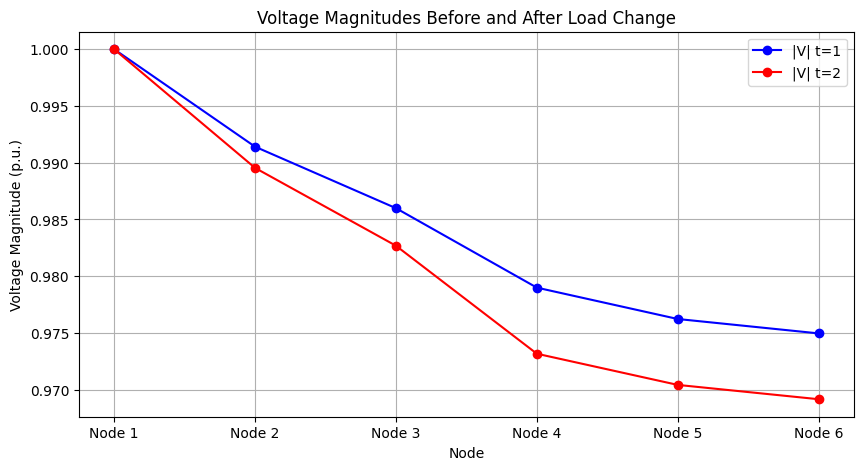

In [91]:
## Ex2 in the paper - trying again for smaller loads ######################################
###########################################################################################

showprint = True

np.random.seed(41)
Vs = 240 + 0j  # Source voltage
zline = np.random.uniform(3e-5, 7e-5, size=(5)) + 1j * np.random.uniform(3e-5, 7e-5, size=(5))  # Random complex impedances
# initial loads
zload = np.random.uniform(0.02, 0.04, size=(5)) + 1j * np.random.uniform(0.001, 0.0051, size=(5))        # Random complex loads with reasonable power factor
# compute voltages
V, Vmag, Vphase = compute_voltages(zline, zload, Vs)
# Calculate power
S = abs(V)**2 * zload.conjugate() /1000
# print results in latex table form for the paper
if showprint: print_latex_table(zload, zline, Vmag, Vphase, S)
  

## Step change the loads ###############
zload_new = zload * np.array([1, 1, 0.5, 1, 1])
z = np.column_stack((zline, zload_new)).ravel()  # Combine line and load impedances
y = 1 / z  # Admittance
Y = np.array([[y[0]+y[1]+y[2], -y[2],           0,              0,              0],
              [-y[2],           y[2]+y[3]+y[4], -y[4],          0,              0],
              [0,               -y[4],          y[4]+y[5]+y[6], -y[6],          0],
              [0,               0,              -y[6],          y[6]+y[7]+y[8], -y[8]],
              [0,               0,              0,              -y[8],          y[8]+y[9]]])  # Admittance matrix
i = np.array([Vs * y[0], 0, 0, 0, 0])  # Current vector
V = np.linalg.inv(Y) @ i  # Solve for voltages
Vmag2 = np.abs(V)  # Magnitude of voltages
Vphase = np.degrees(np.angle(V))  # Phase of voltages

# Calculate power
S2 = abs(V)**2 * zload.conjugate() /1000

# print results in latex table form for the paper
if showprint: print_latex_table(zload_new, zline, Vmag2, Vphase, S2)


## Plot the two voltage profiles ###############################
Vmagp = np.insert(Vmag, 0, 240)  # Insert the source voltage at the beginning
Vmagp2 = np.insert(Vmag2, 0, 240)  # Insert the source voltage at the beginning
plt.figure(figsize=(10, 5))
plt.plot(Vmagp/240, marker='o', label='|V| t=1', color='blue')
plt.plot(Vmagp2/240, marker='o', label='|V| t=2', color='red')
plt.xlabel('Node')
plt.ylabel('Voltage Magnitude (p.u.)')
plt.title('Voltage Magnitudes Before and After Load Change')
plt.xticks(ticks=np.arange(6), labels=[f'Node {i+1}' for i in range(6)])
plt.legend()
plt.grid()
plt.show()

# ## Plot the loads
# z1r = np.real(zload)
# z1i = np.imag(zload)
# z2r = np.real(zload_new)
# z2i = np.imag(zload_new)
# plt.figure(figsize=(10, 5))
# for i in range(5):
#     l, = plt.plot([z1r[i], z2r[i]], [z1i[i], z2i[i]], marker='o', label=f'Load {i+1}')
#     col = l.get_color()
#     plt.annotate("",
#              xy=(z2r[i], z2i[i]), xycoords='data',
#              xytext=(z1r[i], z1i[i]), textcoords='data',
#              arrowprops=dict(arrowstyle="->", color=col, lw=2))
# plt.xlabel('Resistance (Ohms)')
# plt.ylabel('Reactance (Ohms)')
# plt.legend()
# plt.grid()
# plt.title('Load Impedances Before and After Change')
# plt.show()



(0.023725645347964487+0.002290175429316115j)
(0.023725645099086982+0.002290176706458402j)
\begin{table}[ht]
\centering
\caption{caption here}
\label{tab:}
\begin{tabular}{|c|c|c|c|c|}
\hline
$Z_2$ & $Z_4$ & $Z_6$ & $Z_8$ & $Z_{10}$ \\
(26.6+1.3j) & (25.7+3.9j) & (23.7+2.3j) & (26.3+4.1j) & (29.6+2.6j) \\
\hline
$Z_1$ & $Z_3$ & $Z_5$ & $Z_7$ & $Z_9$ \\
(0.04+0.05j) & (0.03+0.04j) & (0.06+0.06j) & (0.03+0.07j) & (0.03+0.05j) \\
\hline
$|V_2|$ & $|V_3|$ & $|V_4|$ & $|V_5|$ & $|V_6|$ \\
237.94 & 236.64 & 234.96 & 234.3 & 233.99 \\
\hline
$\angle V_2$ & $\angle V_3$ & $\angle V_4$ & $\angle V_5$ & $\angle V_6$ \\
-0.52 & -0.81 & -1.13 & -1.38 & -1.46 \\
\hline
$P_2$ & $P_3$ & $P_4$ & $P_5$ & $P_6$ \\
1.509 & 1.437 & 1.31 & 1.446 & 1.622 \\
\hline
$Q_2$ & $Q_3$ & $Q_4$ & $Q_5$ & $Q_6$ \\
-0.073 & -0.218 & -0.126 & -0.223 & -0.144 \\
\hline
\end{tabular}
\end{table}
\begin{table}[ht]
\centering
\caption{caption here}
\label{tab:}
\begin{tabular}{|c|c|c|c|c|}
\hline
$Z_2$ & $Z_4$ & $Z_6$ & $Z_

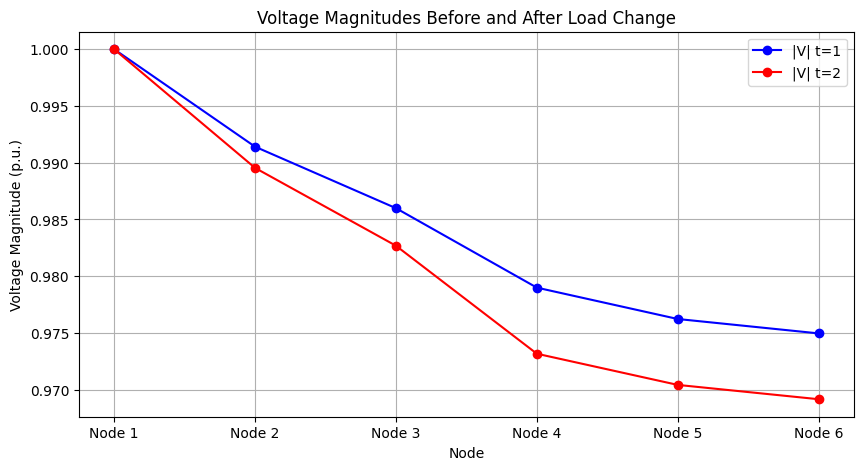

In [90]:
## Ex3 in the paper - Add capacitor ######################################
###########################################################################################

showprint = True

z2og = zload[2]                                 # hold onto the old value
Xc = Vmag[2]**2 / np.imag(S[2])                  # compute Xc value
zc = 0 - 1j*Xc                                  # define capacitor impedance
z_eq = (z2og * zc) / (z2og + zc)                # find equivalent impedance with capacitor in line
print(z2og)
print(z_eq)
zload[2] = z_eq                                 # replace the load 
z = np.column_stack((zline, zload)).ravel()  # Combine line and load impedances
Vs = 240 + 0j  # Source voltage
y = 1 / z  # Admittance
Y = np.array([[y[0]+y[1]+y[2], -y[2],           0,              0,              0],
              [-y[2],           y[2]+y[3]+y[4], -y[4],          0,              0],
              [0,               -y[4],          y[4]+y[5]+y[6], -y[6],          0],
              [0,               0,              -y[6],          y[6]+y[7]+y[8], -y[8]],
              [0,               0,              0,              -y[8],          y[8]+y[9]]])  # Admittance matrix
i = np.array([Vs * y[0], 0, 0, 0, 0])  # Current vector
V = np.linalg.inv(Y) @ i  # Solve for voltages
Vmag = np.abs(V)  # Magnitude of voltages
Vphase = np.degrees(np.angle(V))  # Phase of voltages

# Calculate power
S = abs(V)**2 * zload.conjugate() /1000

# print results in latex table form for the paper
if showprint: print_latex_table(zload, zline, Vmag, Vphase, S)
  

## Step change the loads ###############
zload_new = zload
zload_new[2] = ((z2og * 0.5)*zc) / ((z2og * 0.5) + zc)
z = np.column_stack((zline, zload_new)).ravel()  # Combine line and load impedances
y = 1 / z  # Admittance
Y = np.array([[y[0]+y[1]+y[2], -y[2],           0,              0,              0],
              [-y[2],           y[2]+y[3]+y[4], -y[4],          0,              0],
              [0,               -y[4],          y[4]+y[5]+y[6], -y[6],          0],
              [0,               0,              -y[6],          y[6]+y[7]+y[8], -y[8]],
              [0,               0,              0,              -y[8],          y[8]+y[9]]])  # Admittance matrix
i = np.array([Vs * y[0], 0, 0, 0, 0])  # Current vector
V = np.linalg.inv(Y) @ i  # Solve for voltages
Vmag2 = np.abs(V)  # Magnitude of voltages
Vphase = np.degrees(np.angle(V))  # Phase of voltages

# Calculate power
S2 = abs(V)**2 * zload.conjugate() /1000

# print results in latex table form for the paper
if showprint: print_latex_table(zload_new, zline, Vmag2, Vphase, S2)


## Plot the two voltage profiles ###############################
Vmag = np.insert(Vmag, 0, 240)  # Insert the source voltage at the beginning
Vmag2 = np.insert(Vmag2, 0, 240)  # Insert the source voltage at the beginning
plt.figure(figsize=(10, 5))
plt.plot(Vmag/240, marker='o', label='|V| t=1', color='blue')
plt.plot(Vmag2/240, marker='o', label='|V| t=2', color='red')
plt.xlabel('Node')
plt.ylabel('Voltage Magnitude (p.u.)')
plt.title('Voltage Magnitudes Before and After Load Change')
plt.xticks(ticks=np.arange(6), labels=[f'Node {i+1}' for i in range(6)])
plt.legend()
plt.grid()
plt.show()

# ## Plot the loads
# z1r = np.real(zload)
# z1i = np.imag(zload)
# z2r = np.real(zload_new)
# z2i = np.imag(zload_new)
# plt.figure(figsize=(10, 5))
# for i in range(5):
#     l, = plt.plot([z1r[i], z2r[i]], [z1i[i], z2i[i]], marker='o', label=f'Load {i+1}')
#     col = l.get_color()
#     plt.annotate("",
#              xy=(z2r[i], z2i[i]), xycoords='data',
#              xytext=(z1r[i], z1i[i]), textcoords='data',
#              arrowprops=dict(arrowstyle="->", color=col, lw=2))
# plt.xlabel('Resistance (Ohms)')
# plt.ylabel('Reactance (Ohms)')
# plt.legend()
# plt.grid()
# plt.title('Load Impedances Before and After Change')
# plt.show()
